# Exercise Set 2

Due: **10:00 26 April 2020**

Discussion: **12:00 30 April 2020**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_3952817.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

##  

# Import and understand scientific data [30 Points]

Describe each of the following file types, then load and visualize the corresponding file's contents.

**a.** FITS: Open and visualise the data in `CII_O1.fits`. **10 points**

## Solution

To be fair, this can be rather confusing if you haven't worked with the FITS standard before. The file we use is the same that Dr. Röllig used in the first lecture. This will definitely also be covered in the discussion session.

What is important to know is that the data contained in the HDU has the shape of the givin axes, but it is not specifically those values. For this FITS file, we have Intensity values for axes of 'Frequency', 'RA', 'DEC', and 'Stokes'. The units of the intensity data is given by `BUNIT`: Kelvin. This is typical for radio observational data. The axes can be rebuilt using `CRVAL`, `CRPIX`  and `CDELT` for each axis, and the axes must be linearly-spaced. The units of these axes must be inferred in this case, but typically comments are left for anything that is abnormal. You can find a description of the heder labels [here](https://diffractionlimited.com/help/maximdl/FITS_File_Header_Definitions.htm).

Since axes 2, 3, and 4 have length 1, we can simplify our data to two dimensions: frequency and intensity. One super confusing thing about extracting the data (at least I find it super confusing) is that the axes in the extracted numpy array are reversed compared to the header. This is due to the difference between how axezs are defined in numpy and in the HDU standard. So to access the first axis in the data you would have to use something like `hdul[0].data[0,0,0,:]`.

Now you just need to plot the data and you are done.

In [12]:
from astropy.io import fits
import pprint
    
hdul = fits.open('../../exercise_2/CII_01.fits')
hdul.info()   #print the HDUs contained in the list
print()

header=hdul[0].header
pprint.pprint(header)

Filename: ../../exercise_2/CII_01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   (196, 1, 1, 1)   int32 (rescales to float64)   

SIMPLE  =                    T         /                                        
BITPIX  =                   32         /                                        
NAXIS   =                    4         /                                        
NAXIS1  =                  196         /                                        
NAXIS2  =                    1         /                                        
NAXIS3  =                    1         /                                        
NAXIS4  =                    1         /                                        
BLOCKED =                    T         /                                        
BLANK   =           2147483647         / Blanking value                         
BSCALE  =  0.880492834199E-007         /                                       

In [13]:
spectra=hdul[0].data
print(spectra.shape)
spectra=spectra[0][0][0]

(1, 1, 1, 196)


The x axis is frequency as written in the header. Calculate the frequency axis from the header value.

In [14]:
nx = hdul[0].header['NAXIS1']
crval1 = hdul[0].header['CRVAL1']
cdelt1 = hdul[0].header['CDELT1']
crpix1 = hdul[0].header['CRPIX1']

frequency = [(ix-(crpix1-1))*cdelt1+crval1 for ix in range(nx)]

Actually this is the frequency offset from the rest frequency.

Text(0, 0.5, 'T [K]')

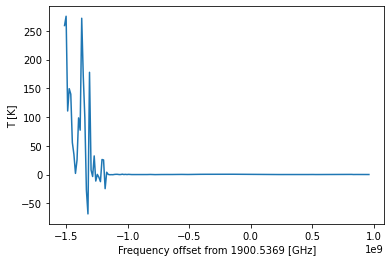

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(frequency,spectra)
plt.xlabel('Frequency offset from {} [GHz]'.format(hdul[0].header['RESTFREQ']*1e-9))
plt.ylabel('T [K]')

Actually the feature at the left edge is a noise close to the edge of the band (although this is difficult to guess without background). We want to look a real spectral feature around the center.

Text(0, 0.5, 'T [K]')

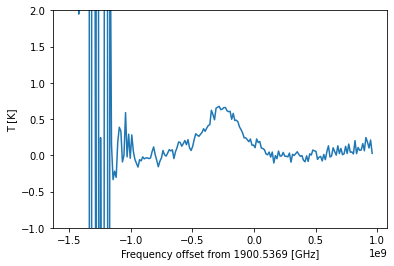

In [62]:
plt.plot(frequency,spectra)
plt.ylim(-1,2)
plt.xlabel('Frequency offset from {} [GHz]'.format(hdul[0].header['RESTFREQ']*1e-9))
plt.ylabel('T [K]')

## 

**b.** HDF4: Open and visualise the data in `2006001-2006005.s0454pfrt-bsst.hdf`. **10 points**

## Solution

You can use `pyhdf` to obtain extract the HDF4 data. This particular file contains a dictionary with three data objects: one for the two axes, and another containing the data. The axes thus do not need to be rebuilt as with the FITS standard.

Contents of dataset are:
{'bsst': (('lat', 'lon'), (4096, 8192), 23, 0), 'lat': (('lat',), (4096,), 6, 1), 'lon': (('lon',), (8192,), 6, 2)}

Header of 'bsst':
{'dsp_PixelType': 1, 'dsp_PixelSize': 2, 'dsp_Flag': 0, 'dsp_nBits': 16, 'dsp_LineSize': 0, 'dsp_cal_name': 'Temperature', 'units': 'Temp', 'dsp_cal_eqnNumber': 2, 'dsp_cal_CoeffsLength': 8, 'dsp_cal_coeffs': [0.07500000298023224, -3.0], 'scale_factor': 0.07500000298023224, 'add_off': -3.0}
[-179.98197937 -179.93803406 -179.89408875 ...  179.89408875  179.93803406
  179.98197937]
[ 89.98000336  89.93605804  89.89211273 ... -89.89211273 -89.93605804
 -89.98000336]


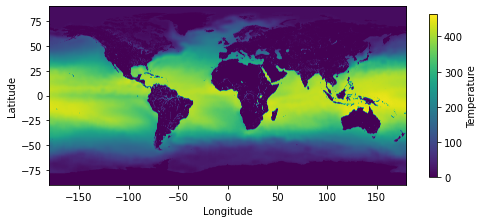

In [63]:
from pyhdf.SD import *
import matplotlib.pyplot as plt
import pprint

file = SD('../../exercise_2/2006001-2006005.s0454pfrt-bsst.hdf', SDC.READ)

dataset = file.datasets()

print("Contents of dataset are:")
print(dataset)

bsst_obs = file.select('bsst')
bsst = bsst_obs.get()

bsst_header = bsst_obs.attributes()
print("")
print("Header of 'bsst':")
print(bsst_header)

lon_obj = file.select('lon')
lon = lon_obj.get()

lat_obj = file.select('lat')
lat = lat_obj.get()

print(lon)
print(lat)

fig, ax = plt.subplots(figsize=(8,5))
cm = ax.imshow(bsst,vmin=0,extent=(lon[0],lon[-1],lat[-1],lat[0]),\
          origin='upper',aspect='equal')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
cb = plt.colorbar(cm, shrink=0.6)
cb.ax.set_ylabel('Temperature');

**!!** You also need to have hdf4 C library on your system to successfully run 'pip install pyhdf'. If you see an error something like "Python.h: No such file or directory", then try the following first. **!!**

## 

**c.** HDF5: Open and visualise the data in `3B-HHR.MS.MRG.3IMERG.20141001-S090000-E092959.0540.V05B.HDF5`. **10 points**

## Solution

This is a more heirarchical data structure, also including a dictionary.

In [82]:
pd.read_hdf(hdffilename)

ValueError: No dataset in HDF5 file.

It is worth noting that `pandas` also contains HDF5 functionality, but it is specifically for `pandas` dataframes. It cannot read standard HDF5 files. We instead have to use `h5py`.

In [1]:
import h5py

hdffilename = "../../exercise_2/3B-HHR.MS.MRG.3IMERG.20141001-S090000-E092959.0540.V05B.HDF5"
hdf_file = h5py.File(hdffilename,'r')

To see the top-level meta data,

In [2]:
topmeta=hdf_file['/']
print(topmeta.attrs.keys())

KeysView(<Attributes of HDF5 object at 139760256460464>)


In [3]:
fileheader = topmeta.attrs.__getitem__('FileHeader')
print(fileheader.decode('UTF-8'))

DOI=10.5067/GPM/IMERG/3B-HH/05;
DOIauthority=http://dx.doi.org/;
DOIshortName=3IMERGHH;
AlgorithmID=3IMERGHH;
AlgorithmVersion=3IMERGH_1.0;
FileName=3B-HHR.MS.MRG.3IMERG.20141001-S090000-E092959.0540.V05B.HDF5;
SatelliteName=MULTI;
InstrumentName=MERGED;
GenerationDateTime=2017-11-18T17:02:13.000Z;
StartGranuleDateTime=2014-10-01T09:00:00.000Z;
StopGranuleDateTime=2014-10-01T09:29:59.999Z;
GranuleNumber=;
NumberOfSwaths=0;
NumberOfGrids=1;
GranuleStart=;
TimeInterval=HALF_HOUR;
ProcessingSystem=PPS;
ProductVersion=V05B;
EmptyGranule=NOT_EMPTY;
MissingData=;



In [4]:
fileinfo = topmeta.attrs.__getitem__('FileInfo')
print(fileinfo.decode('UTF-8'))

DataFormatVersion=cn;
TKCodeBuildVersion=3;
MetadataVersion=cv;
FormatPackage=HDF5-1.8.9;
BlueprintFilename=GPM.V1.3IMERGHH.blueprint.xml;
BlueprintVersion=BV_58;
TKIOVersion=3.80.33;
MetadataStyle=PVL;
EndianType=LITTLE_ENDIAN;



How can we get an overview of the structure?

In [5]:
print(list(hdf_file.keys()))

['Grid']


But this does not show the whole tree structures.

In [6]:
def PrintDataset(name, obj):
    if isinstance(obj,h5py.Dataset):
        print(name)
        print('\t',obj)
hdf_file.visititems(PrintDataset)

Grid/precipitationQualityIndex
	 <HDF5 dataset "precipitationQualityIndex": shape (3600, 1800), type "<f4">
Grid/IRkalmanFilterWeight
	 <HDF5 dataset "IRkalmanFilterWeight": shape (3600, 1800), type "<i2">
Grid/HQprecipSource
	 <HDF5 dataset "HQprecipSource": shape (3600, 1800), type "<i2">
Grid/lon
	 <HDF5 dataset "lon": shape (3600,), type "<f4">
Grid/precipitationCal
	 <HDF5 dataset "precipitationCal": shape (3600, 1800), type "<f4">
Grid/precipitationUncal
	 <HDF5 dataset "precipitationUncal": shape (3600, 1800), type "<f4">
Grid/lat
	 <HDF5 dataset "lat": shape (1800,), type "<f4">
Grid/HQprecipitation
	 <HDF5 dataset "HQprecipitation": shape (3600, 1800), type "<f4">
Grid/probabilityLiquidPrecipitation
	 <HDF5 dataset "probabilityLiquidPrecipitation": shape (3600, 1800), type "<i2">
Grid/HQobservationTime
	 <HDF5 dataset "HQobservationTime": shape (3600, 1800), type "<i2">
Grid/randomError
	 <HDF5 dataset "randomError": shape (3600, 1800), type "<f4">
Grid/IRprecipitation
	 <HDF5

There is a bunch of different data contained in this file. We will examine one of these - 'HQobservationTime' - in more detail.

In [7]:
meta=hdf_file['Grid/lon']
print(meta.attrs.keys())

fileinfo = meta.attrs.__getitem__('Units')
print(fileinfo.decode('UTF-8'))

meta=hdf_file['Grid/lat']
print(meta.attrs.keys())

fileinfo = meta.attrs.__getitem__('Units')
print(fileinfo.decode('UTF-8'))

meta=hdf_file['Grid/HQobservationTime']
print(meta.attrs.keys())

fileinfo = meta.attrs.__getitem__('DimensionNames')
print(fileinfo.decode('UTF-8'))
fileinfo = meta.attrs.__getitem__('units')
print(fileinfo.decode('UTF-8'))
fileinfo = meta.attrs.__getitem__('Units')
print(fileinfo.decode('UTF-8'))

KeysView(<Attributes of HDF5 object at 139759540983856>)
degrees_east
KeysView(<Attributes of HDF5 object at 139759540985680>)
degrees_north
KeysView(<Attributes of HDF5 object at 139759540985296>)
lon,lat
minutes
minutes


In [8]:
hdf_file.close()

It would be useful if we can store the contents into pandas dataframe.

In [9]:
import pandas as pd
import numpy as np

def get_df_from_hdf(hdffilename,datasets):
    header = {'filename':hdffilename}

    with h5py.File(hdffilename,'r') as f:
        for colname, dataset in datasets.items():
            ds = f[dataset]
            header[colname] = [ds[()]]

    df = pd.DataFrame(header)
    return df

datasets = {'lat':'Grid/lat', 'lon':'Grid/lon', 'HQobservationTime':'Grid/HQobservationTime'}
df = get_df_from_hdf(hdffilename,datasets)
print(df)

                                            filename  \
0  ../../exercise_2/3B-HHR.MS.MRG.3IMERG.20141001...   

                                                 lat  \
0  [-89.95, -89.85, -89.75, -89.65, -89.55, -89.4...   

                                                 lon  \
0  [-179.95, -179.85, -179.75, -179.65, -179.55, ...   

                                   HQobservationTime  
0  [[-9999, -9999, -9999, -9999, -9999, -9999, -9...  


(1800, 3600)
(3600,)


Text(0, 0.5, 'Observation Time')

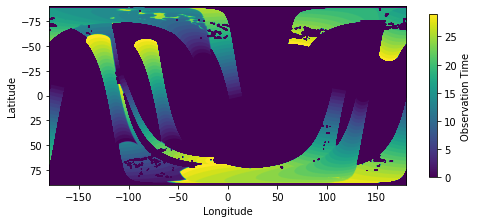

In [16]:
obstime=df['HQobservationTime'].values[0]
obstime=np.transpose(obstime)
lat=df['lat'].values[0]
lon=df['lon'].values[0]

print(obstime.shape)
print(lon.shape)


fig, ax = plt.subplots(figsize=(8,5))
cm = ax.imshow(obstime,vmin=0,extent=(lon[0],lon[-1],lat[-1],lat[0]),\
          origin='upper',aspect='equal')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
cb = plt.colorbar(cm, shrink=0.6)
cb.ax.set_ylabel('Observation Time')

##  

# 2. Global $CO_2$ emissions [70 points]

Open the data in `co2-data.dat` to answer the following questions. It contains historical $CO_2$ emissions of each country per capita.

> The data is modified from [this](https://github.com/owid/co2-data) source. The numbers were not changed, but another column was added to identify the continent.

In [9]:
import numpy as np
import pandas as pd

# data = np.genfromtxt('../../exercise_2/owid-co2-data.csv', names=True, delimiter=',', dtype=None)
data = pd.read_csv('owid-co2-data.csv')

In [10]:
data_refined = data[(data['iso_code']>'') & (data['iso_code']!='OWID_WRL')]

In [11]:
data_refined.insert(2, 'continent', '')

In [12]:
north_america = ['Greenland', 'Canada', 'United States', 'Mexico', 'Bahamas', 'Guatemala', 'Belize', 'Honduras', 'El Salvador', 'Nicaragua', 
                 'Costa Rica', 'Panama', 'Trinidad and Tobago', 'Barbados', 'Grenada', 'Saint Vincent and the Grenadines', 'Bermuda', 
                 'Saint Lucia', 'Dominica', 'Antigua and Barbuda', 'Saint Kitts and Nevis', 'Dominican Republic', 'Haiti', 'Jamaica', 'Cuba', 
                 'Sint Maarten (Dutch part)', 'Anguilla', 'British Virgin Islands', 'Montserrat', 'Puerto Rico', 'Saint Pierre and Miquelon',
                 'Turks and Caicos Islands']
south_america = ['Colombia', 'Venezuela', 'Guyana', 'Suriname', 'Ecuador', 'Peru', 'Bolivia', 'Chile', 'Argentina', 'Paraguay', 'Brazil', 'Uruguay', 
                 'Aruba', 'Bonaire Sint Eustatius and Saba']
europe = ['Russia', 'Norway', 'Iceland', 'Sweden', 'Finland', 'Denmark', 'Estonia', 'Latvia', 'Lithuania', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 
          'Hungary', 'Slovakia', 'Slovenia', 'Poland', 'Bulgaria', 'Serbia', 'Greece', 'Cyprus', 'Croatia', 'Bosnia and Herzegovina', 'Montenegro', 'Albania', 
          'North Macedonia', 'Austria', 'Czechia', 'Germany', 'Switzerland', 'Italy', 'France', 'Luxembourg', 'Netherlands', 'Belgium', 'United Kingdom', 
          'Ireland', 'Spain', 'Portugal', 'Malta', 'Andorra', 'Faeroe Islands', 'Kosovo', 'Liechtenstein']
asia = ['Kazakhstan', 'Mongolia', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Azerbaijan', 'Georgia', 'Turkey', 'Syria', 'Israel', 
        'Jordan', 'Iraq', 'Saudi Arabia', 'Kuwait', 'Bahrain', 'Qatar', 'United Arab Emirates', 'Oman', 'Afghanistan', 'Pakistan', 'India', 
        'Nepal', 'China', 'Bhutan', 'Bangladesh', 'Myanmar', 'Thailand', 'Laos', 'Vietnam', 'Malaysia', 'Indonesia', 'Timor', 'Brunei', 
        'Philippines', 'Taiwan', 'Japan', 'South Korea', 'North Korea', 'Cambodia', 'Yemen', 'Lebanon', 'Armenia', 'Singapore', 'Sri Lanka', 
        'Oman', 'Christmas Island', 'Hong Kong', 'Iran', 'Maldives', 'Palestine']
africa = ['Morocco', 'Algeria', 'Tunisia', 'Libya', 'Egypt', 'Mauritania', 'Mali', 'Chad', 'Sudan', 'Eritrea', 'Somalia', 'Ethiopia', 
          'South Sudan', 'Central African Republic', 'Cameroon', 'Nigeria', 'Niger', 'Benin', 'Togo', 'Ghana', 'Burkina Faso', 'Guinea', 
          'Liberia', 'Sierra Leone', 'Senegal', 'Cape Verde', 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe', 'Congo', 
          'Democratic Republic of Congo', 'Uganda', 'Rwanda', 'Burundi', 'Kenya', 'Tanzania', 'Mozambique', 'Malawi', 'Zambia', 'Angola', 
          'Namibia', 'Botswana', 'South Africa', 'Lesothro', 'Eswatini', 'Zimbabwe', 'Madagascar', 'Mauritius', 'Comoros', 'Seychelles', 
          'Djibouti', "Cote d'Ivoire", 'Gambia', 'Guinea-Bissau', 'Lesotho', 'Saint Helena']
oceania = ['Papua New Guinea', 'Solomon Islands', 'Nauru', 'Marshall Islands', 'Kiribati', 'Tuvalu', 'Samoa', 'Tonga', 'Fiji', 'Vanuatu', 'New Caledonia', 
           'Australia', 'New Zealand', 'Wallis and Futuna Islands', 'Cook Islands', 'French Polynesia', 'Niue', 'Palau']

data_refined.loc[(data_refined['country'].isin(north_america)), ('continent')] = 'North America'
data_refined.loc[(data_refined['country'].isin(south_america)), ('continent')] = 'South America'
data_refined.loc[(data_refined['country'].isin(europe)), ('continent')] = 'Europe'
data_refined.loc[(data_refined['country'].isin(asia)), ('continent')] = 'Asia'
data_refined.loc[(data_refined['country'].isin(africa)), ('continent')] = 'Africa'
data_refined.loc[(data_refined['country'].isin(oceania)), ('continent')] = 'Oceania'

In [67]:
data_refined.to_csv('../../exercise_2/co2-data.csv')

## 

**a.** Compute the mean $CO_2$ per capita emission in 2017. What is the standard deviation and median? **10 points**

### Solution

We are just looking at the emission per capita for each country, but not weighting it by any other value. There are many factors affecting these emissions which we cannot take into account in this dataset (though there are many columns you can examine to find interesting trends).

`pandas` will automatically disregard the NaN values, but if you use `numpy` you might encounter errors. In that case, use `np.nanmean()` and similar methods for the statistics.

In [12]:
import pandas as pd

dataset = pd.read_csv('../../exercise_2/co2-data.csv')
subsample_2017 = dataset.loc[dataset['year'] == 2017]
print('CO2 emissions')
print('Global per capita mean: {:.4f}'.format(subsample_2017['co2_per_capita'].mean()))
print('Global per capita standard deviation: {:.4f}'.format(subsample_2017['co2_per_capita'].std()))
print('Global per capita median: {:.4f}'.format(subsample_2017['co2_per_capita'].median()))
subsample_2017

CO2 emissions
Global per capita mean: 4.8729
Global per capita standard deviation: 5.7459
Global per capita median: 2.9515


,Unnamed: 0,iso_code,country,continent,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
68,68,AFG,Afghanistan,Asia,2017,6.860,1.708,0.115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296000.0,NaN
155,291,ALB,Albania,Europe,2017,5.404,20.212,0.909,6.186,0.782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2884000.0,NaN
259,395,DZA,Algeria,Africa,2017,153.448,3.097,4.609,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41389000.0,NaN
289,425,AND,Andorra,Europe,2017,0.465,-0.781,-0.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77000.0,NaN
359,495,AGO,Angola,Africa,2017,37.471,9.850,3.360,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29817000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20381,23159,VNM,Vietnam,Asia,2017,182.584,-1.536,-2.848,190.143,7.558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94601000.0,NaN
20400,23178,WLF,Wallis and Futuna Islands,Oceania,2017,0.026,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20470,23518,YEM,Yemen,Asia,2017,10.107,-3.057,-0.319,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27835000.0,NaN
20540,23588,ZMB,Zambia,Africa,2017,6.520,34.763,1.682,9.782,3.263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16854000.0,NaN


We can also examine the column names in case we need a reference.

In [3]:
dataset.columns

Index(['Unnamed: 0', 'iso_code', 'country', 'continent', 'year', 'co2',
       'co2_growth_prct', 'co2_growth_abs', 'consumption_co2', 'trade_co2',
       'trade_co2_share', 'co2_per_capita', 'consumption_co2_per_capita',
       'share_global_co2', 'cumulative_co2', 'share_global_cumulative_co2',
       'co2_per_gdp', 'consumption_co2_per_gdp', 'co2_per_unit_energy',
       'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'other_industry_co2', 'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'other_co2_per_capita', 'share_global_coal_co2', 'share_global_oil_co2',
       'share_global_gas_co2', 'share_global_flaring_co2',
       'share_global_cement_co2', 'cumulative_coal_co2', 'cumulative_oil_co2',
       'cumulative_gas_co2', 'cumulative_flaring_co2', 'cumulative_cement_co2',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_oil_co2',
       'share_global_cumulativ

## 

**b.** This compares the data of countries in numerous stages of development. Try separating the data by continent, then calculate the mean, standard deviation, and median in 2017. Show this data in a convenient plot (maybe in a box plot). What are the limitations to this data reduction? **20 points**

### Solution

Here we will use `seaborn` for the box-whisker plots. The ideal input for this package is a `pandas` DataFrame, so we should have everything we need to make some nice plots.

Of note is the use of `seaborn.swarmplot()` after the box plot. Since we first make a `matplotlib` Axis and use it as an argument, this plots the swarm plot over of the box plot. This is just to hightlight where the data lies in the box., and it is also the source of the error message. Since the figure is too small, `seaborn` is complaining about not being able to include all of the data in the swarm plot. This can be fixed by either decreasing the marker size or increasing the figure size. Or you can just ignore it like me, since it shows enough of the distribution :-)

               co2 mean   co2 std  co2 median
continent                                    
Africa         1.201226  1.802184      0.3960
Asia           6.845694  8.142382      3.4190
Europe         6.774860  3.169785      6.0580
North America  6.050452  6.440145      3.6960
Oceania        4.340000  5.702985      2.4250
South America  4.028357  3.335294      2.6645


C:\Users\cyani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


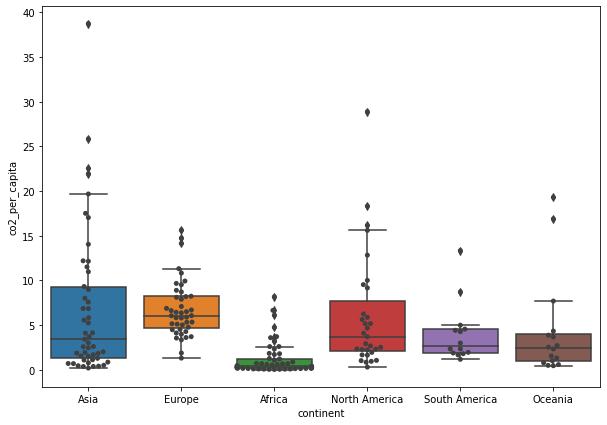

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

data_reduced = subsample_2017[['continent', 'co2', 'co2_per_capita', 'population']]

subsample_continent_mean = data_reduced.groupby('continent')['co2_per_capita'].mean()
subsample_continent_std = data_reduced.groupby('continent')['co2_per_capita'].std()
subsample_continent_median = data_reduced.groupby('continent')['co2_per_capita'].median()
frame = {'co2 mean':subsample_continent_mean, 'co2 std':subsample_continent_std, 'co2 median':subsample_continent_median}
subsample_continent = pd.DataFrame(frame)
print(subsample_continent)

fig,ax = plt.subplots(1, 1, figsize=(10,7))
sns.boxplot(x='continent', y='co2_per_capita', data=data_reduced, ax=ax)
sns.swarmplot(x='continent', y='co2_per_capita', data=data_reduced, ax=ax, color=".25") ;

This is also done for the world to show the distribution of $CO_2$ emission, but it is not necessary to show this plot for this problem.

CO2 emissions
Global per capita mean: 4.8729
Global per capita standard deviation: 5.7459
Global per capita median: 2.9515


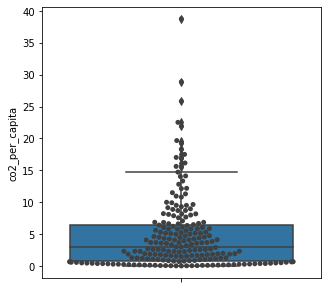

In [11]:
data_reduced = subsample_2017[['continent', 'co2', 'co2_per_capita', 'population']]

print('CO2 emissions')
print('Global per capita mean: {:.4f}'.format(subsample_2017['co2_per_capita'].mean()))
print('Global per capita standard deviation: {:.4f}'.format(subsample_2017['co2_per_capita'].std()))
print('Global per capita median: {:.4f}'.format(subsample_2017['co2_per_capita'].median()))

fig,ax = plt.subplots(1, 1, figsize=(5,5))
sns.boxplot(y='co2_per_capita', data=data_reduced, ax=ax)
sns.swarmplot(y='co2_per_capita', data=data_reduced, ax=ax, color=".25") ;

## 

**c.** To fully access the contribution of each country to global emissions, we should look at the cumulative emission. What are the mean, standard deviation, and median standard deviation of the dataset? Show this information for both the world and separated by continent. **20 points**

### Solution

In [92]:
data_reduced = dataset[['country', 'continent', 'co2']].groupby(['country', 'continent']).sum()
data_reduced

,,co2
country,continent,
Afghanistan,Asia,181.377
Albania,Europe,282.496
Algeria,Africa,4445.487
Andorra,Europe,14.543
Angola,Africa,710.972
...,...,...
Vietnam,Asia,3635.934
Wallis and Futuna Islands,Oceania,0.486
Yemen,Asia,615.412


CO2 emissions
Global cumulative mean: 7559.946070422536
Global cumulative standard deviation: 34196.179816745076
Global cumulative median: 348.11699999999996


C:\Users\cyani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


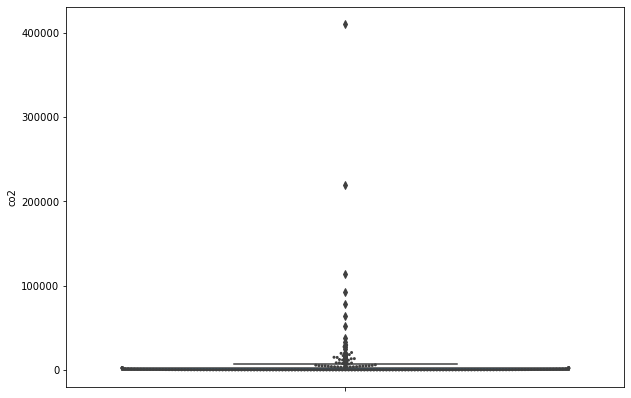

In [16]:
data_reduced = dataset[['country', 'continent', 'co2']].groupby(['country', 'continent'])['co2'].sum().reset_index()

print('CO2 emissions')
print('Global cumulative mean:', data_reduced['co2'].mean())
print('Global cumulative standard deviation:', data_reduced['co2'].std())
print('Global cumulative median:', data_reduced['co2'].median())

fig,ax = plt.subplots(figsize=(10, 7))
sns.boxplot(y='co2', data=data_reduced, ax=ax)
sns.swarmplot(y='co2', data=data_reduced, ax=ax, s=3, color=".25") ;

We can also look at the biggest contributers to global $CO_2$ emissions using the `head()` method.

In [129]:
data_reduced['country'].loc[data_reduced['co2'].argsort()[::-1]].head(10)

203     United States
40              China
156            Russia
73            Germany
202    United Kingdom
95              Japan
87              India
68             France
35             Canada
200           Ukraine
Name: country, dtype: object

The boxplot for total $CO_2$ emissions are quite skewed, so it is better to limit the y-axis of the plot.

CO2 emissions
                   co2 mean       co2 std  co2 median
continent                                            
Africa           834.943309   2960.022953     75.3910
Asia           10149.186360  32512.358401   1929.2025
Europe         11934.697591  24519.897689   2865.8820
North America  14673.573031  72489.929045     60.1075
Oceania         1136.944333   4275.703685      4.6495
South America   2981.520286   4450.450685    839.8685


C:\Users\cyani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\cyani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\cyani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


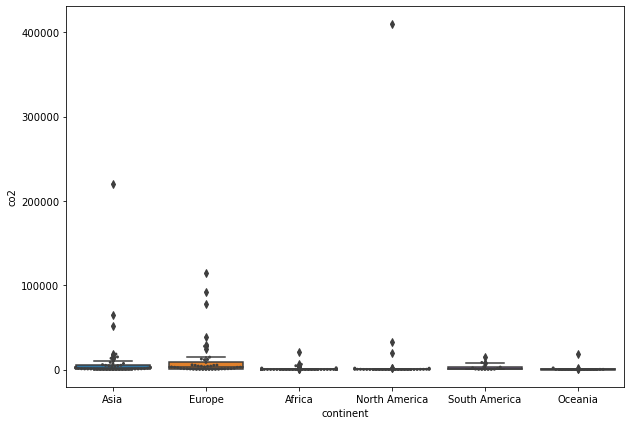

In [15]:
data_reduced = dataset[['country', 'continent', 'co2']].groupby(['country', 'continent'])['co2'].sum().reset_index()

print('CO2 emissions')
subsample_continent_mean = data_reduced.groupby('continent')['co2'].mean()
subsample_continent_std = data_reduced.groupby('continent')['co2'].std()
subsample_continent_median = data_reduced.groupby('continent')['co2'].median()
frame = {'co2 mean':subsample_continent_mean, 'co2 std':subsample_continent_std, 'co2 median':subsample_continent_median}
subsample_continent = pd.DataFrame(frame)
print(subsample_continent)

fig,ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x='continent', y='co2', data=data_reduced, ax=ax)
sns.swarmplot(x='continent', y='co2', data=data_reduced, ax=ax, s=3, color=".25") ;

CO2 emissions
                   co2 mean       co2 std  co2 median
continent                                            
Africa           834.943309   2960.022953     75.3910
Asia           10149.186360  32512.358401   1929.2025
Europe         11934.697591  24519.897689   2865.8820
North America  14673.573031  72489.929045     60.1075
Oceania         1136.944333   4275.703685      4.6495
South America   2981.520286   4450.450685    839.8685


C:\Users\cyani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\cyani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\cyani\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


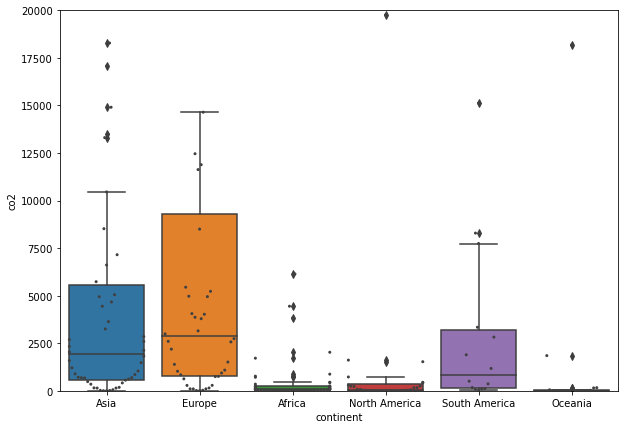

In [20]:
data_reduced = dataset[['country', 'continent', 'co2']].groupby(['country', 'continent'])['co2'].sum().reset_index()

print('CO2 emissions')
subsample_continent_mean = data_reduced.groupby('continent')['co2'].mean()
subsample_continent_std = data_reduced.groupby('continent')['co2'].std()
subsample_continent_median = data_reduced.groupby('continent')['co2'].median()
frame = {'co2 mean':subsample_continent_mean, 'co2 std':subsample_continent_std, 'co2 median':subsample_continent_median}
subsample_continent = pd.DataFrame(frame)
print(subsample_continent)

fig,ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x='continent', y='co2', data=data_reduced, ax=ax)
sns.swarmplot(x='continent', y='co2', data=data_reduced, ax=ax, s=3, color=".25")
plt.ylim([0, 20000]) ;

## 

**d.** We can also look at this history of $CO_2$ emissions by each country. Calculate the mean emission for the U.S., U.K., Germany, and China. Is this metric useful? In which year was the peak emission from these countries? Are they starting to gain control of their emissions? **20 points**

### Solution

Looking at the annual $CO_2$ emission history of these countries, we can better-understand how they are controlling their emissions. The United Kingdom, United States, and Germany have had plenty of $CO_2$ emissions during their industrial phases, but now seem to be reducing their emissions. China is still increasing their emissions. This dataset ends at 2019, so it would be interesting to see how each country's emissions were affected by the pandemic. That will need newer data, though.

                   co2 mean      co2 std  co2 median
country                                             
China           1848.620706  2890.360371    435.7040
Germany          403.418079   382.868824    329.3440
United Kingdom   288.280374   225.313168    315.1280
United States   1864.719400  2065.292513   1231.4285


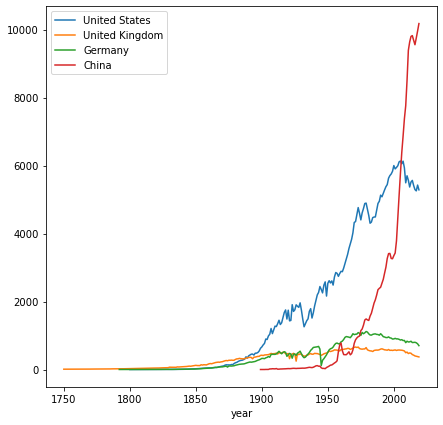

In [179]:
%matplotlib inline

countries = ['United States', 'United Kingdom', 'Germany', 'China']
data_reduced = dataset[['year', 'co2', 'country']].loc[dataset['country'].isin(countries)]
# data_reduced['co2'] = data_reduced.groupby('country')['co2'].cumsum()

subsample_country_mean = data_reduced.groupby('country')['co2'].mean()
subsample_country_std = data_reduced.groupby('country')['co2'].std()
subsample_country_median = data_reduced.groupby('country')['co2'].median()
frame = {'co2 mean':subsample_country_mean, 'co2 std':subsample_country_std, 'co2 median':subsample_country_median}
subsample_country = pd.DataFrame(frame)
print(subsample_country)

fig,ax = plt.subplots(figsize=(7,7))
for country in countries:
    data_reduced.loc[data_reduced['country'] == country].plot.line(x='year', y='co2', label=country, ax=ax)
# data_reduced.groupby('country').plot.line(x='year', y='co2', label=data_reduced['country'], ax=ax)

Looking at cumulative emissions, though, makes it plain to see the United States have emitted more than the other three combined.

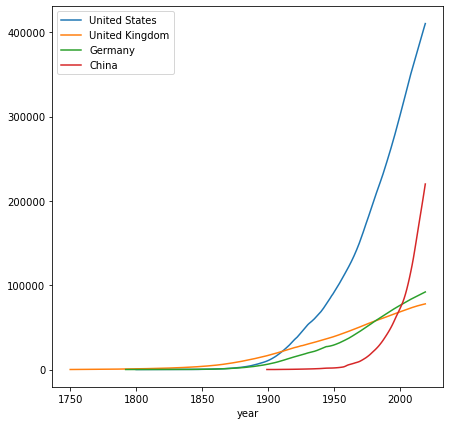

In [167]:
%matplotlib inline

countries = ['United States', 'United Kingdom', 'Germany', 'China']
data_reduced = dataset[['year', 'co2', 'country']].loc[dataset['country'].isin(countries)]
data_reduced['co2'] = data_reduced.groupby('country')['co2'].cumsum()

fig,ax = plt.subplots(figsize=(7,7))
for country in countries:
    data_reduced.loc[data_reduced['country'] == country].plot.line(x='year', y='co2', label=country, ax=ax)
# data_reduced.groupby('country').plot.line(x='year', y='co2', label=data_reduced['country'], ax=ax)